In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
products = pd.read_csv('/content/Flipkart_Amazon Mobile Reviews.csv') 
products

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name
0,0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
...,...,...,...,...,...
23772,23772,Batten in this rangee,4.0 out of 5 stars,Must he Bhai iss range me bas cemra thoda sa s...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23773,23773,Good mobile,4.0 out of 5 stars,Good product,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23774,23774,Good camera,5.0 out of 5 stars,Good,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23775,23775,Warest mobile,1.0 out of 5 stars,Don't buy this mobile phone money weast screen...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."


In [ ]:
products.describe(include='object')

,Review-Title,rating,Review-Body,Product Name
count,23775,23777,23160,23777
unique,15040,5,18597,8
top,Good,5.0 out of 5 stars,Good,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto..."
freq,1295,9399,962,4460


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23777 entries, 0 to 23776
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    23777 non-null  int64 
 1   Review-Title  23775 non-null  object
 2   rating        23777 non-null  object
 3   Review-Body   23160 non-null  object
 4   Product Name  23777 non-null  object
dtypes: int64(1), object(4)
memory usage: 928.9+ KB


In [ ]:
products["rating"].value_counts()

5.0 out of 5 stars    9399
1.0 out of 5 stars    5231
4.0 out of 5 stars    4886
3.0 out of 5 stars    2703
2.0 out of 5 stars    1558
Name: rating, dtype: int64

In [ ]:
products.isna().sum()

Unnamed: 0        0
Review-Title      2
rating            0
Review-Body     617
Product Name      0
dtype: int64

##Exploratory Data Analysis

In [ ]:
products.dropna(inplace=True)

In [ ]:
products.shape

(23159, 5)

In [ ]:
products["rating"].replace({"5.0 out of 5 stars": 5,
                     "4.0 out of 5 stars": 4,
                     "3.0 out of 5 stars": 3,
                     "2.0 out of 5 stars": 2,
                     "1.0 out of 5 stars": 1}, inplace=True)

products["rating"].value_counts()

5    9069
1    5161
4    4749
3    2650
2    1530
Name: rating, dtype: int64

In [ ]:
products

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name
0,0,Worst phone ever,1,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,2,Awesome look,5,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,4,Read,1,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
...,...,...,...,...,...
23772,23772,Batten in this rangee,4,Must he Bhai iss range me bas cemra thoda sa s...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23773,23773,Good mobile,4,Good product,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23774,23774,Good camera,5,Good,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23775,23775,Warest mobile,1,Don't buy this mobile phone money weast screen...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."


Text(0, 0.5, 'Count')

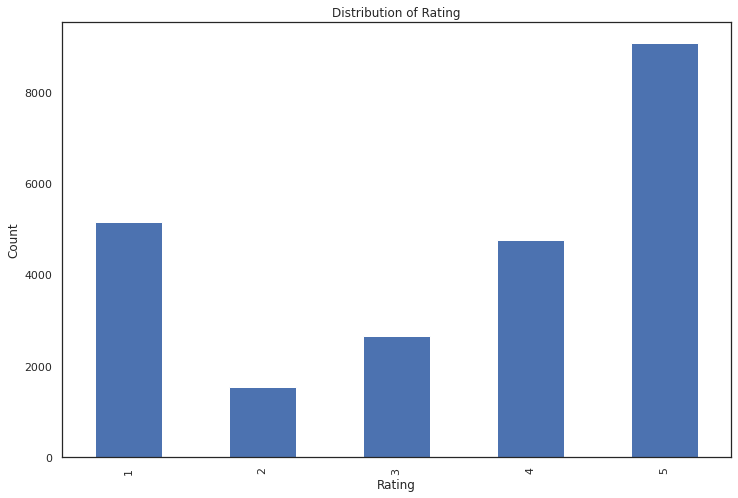

In [ ]:
plt.figure(figsize=(12,8))
products["rating"].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

In [ ]:
products['Brands'] = products['Product Name'].str.split(' ').str[0]

In [ ]:
products

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name,Brands
0,0,Worst phone ever,1,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus
1,1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus
2,2,Awesome look,5,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus
3,3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus
4,4,Read,1,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus
...,...,...,...,...,...,...
23772,23772,Batten in this rangee,4,Must he Bhai iss range me bas cemra thoda sa s...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",vivo
23773,23773,Good mobile,4,Good product,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",vivo
23774,23774,Good camera,5,Good,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",vivo
23775,23775,Warest mobile,1,Don't buy this mobile phone money weast screen...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",vivo


Text(0.5, 1.0, 'Number of Reviews for different Brands')

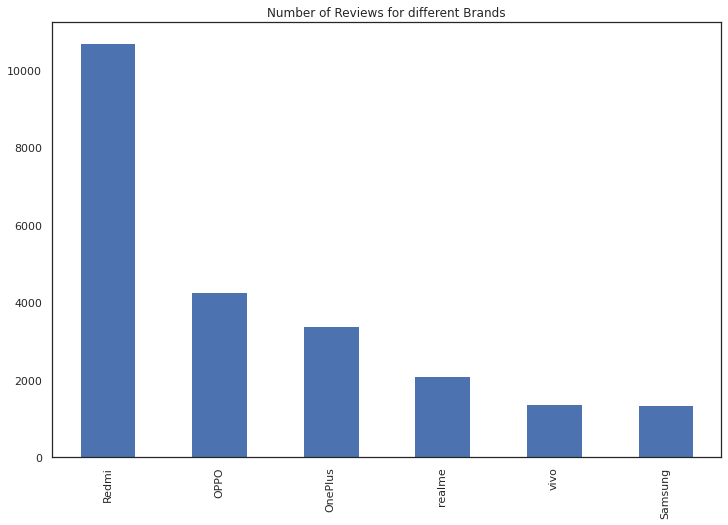

In [ ]:
brands = products['Brands'].value_counts()
plt.figure(figsize=(12,8))
brands[:].plot(kind='bar')
plt.title("Number of Reviews for different Brands")

Text(0.5, 1.0, 'Number of Reviews for Top 10 Products')

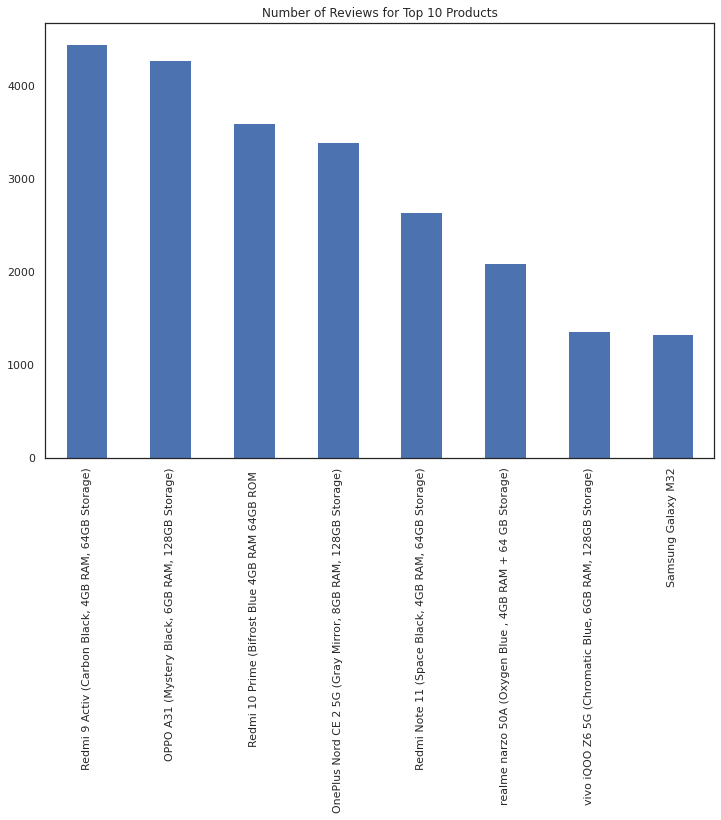

In [ ]:
models = products["Product Name"].value_counts()
plt.figure(figsize=(12,8))
models[:10].plot(kind='bar')
plt.title("Number of Reviews for Top 10 Products")

##Pre-Processing the data

In [ ]:
prod1 = products[['rating','Review-Body']]
prod1.head()

,rating,Review-Body
0,1,Hang problem
1,2,I'm writing this review after using 3days !!!B...
2,5,Camera is so good n very fast phone back look ...
3,3,The media could not be loaded.\n ...
4,1,I got my delivery on 23 feb when I unboxed the...


In [ ]:
def assign_sentiment(rating):
  if float(rating) >= 3:
    return "Positive"
  else:
    return "Negative"
prod1['sentiment'] = prod1['rating'].apply(assign_sentiment)
prod1.head()

,rating,Review-Body,sentiment
0,1,Hang problem,Negative
1,2,I'm writing this review after using 3days !!!B...,Negative
2,5,Camera is so good n very fast phone back look ...,Positive
3,3,The media could not be loaded.\n ...,Positive
4,1,I got my delivery on 23 feb when I unboxed the...,Negative


In [ ]:
prod1.drop('rating', inplace=True, axis=1)
prod1.head()

,Review-Body,sentiment
0,Hang problem,Negative
1,I'm writing this review after using 3days !!!B...,Negative
2,Camera is so good n very fast phone back look ...,Positive
3,The media could not be loaded.\n ...,Positive
4,I got my delivery on 23 feb when I unboxed the...,Negative


##Removing punctuation (.!<>{}’,”(/)-)

In [ ]:
prod1["Review-Body"]

0                                             Hang problem
1        I'm writing this review after using 3days !!!B...
2        Camera is so good n very fast phone back look ...
3        The media could not be loaded.\n              ...
4        I got my delivery on 23 feb when I unboxed the...
                               ...                        
23772    Must he Bhai iss range me bas cemra thoda sa s...
23773                                         Good product
23774                                                 Good
23775    Don't buy this mobile phone money weast screen...
23776    Phone is Good . Camera not upto the mark. UI i...
Name: Review-Body, Length: 23159, dtype: object

In [ ]:
# Replacing punctuations with space
prod1["Review-Body_processed"] = prod1["Review-Body"].str.replace("[^a-zA-Z0-9]", " ") 

# Re ordering columns
prod1 = prod1[['Review-Body','Review-Body_processed','sentiment']]

In [ ]:
prod1["Review-Body_processed"]

0                                             Hang problem
1        I m writing this review after using 3days    B...
2        Camera is so good n very fast phone back look ...
3        The media could not be loaded                 ...
4        I got my delivery on 23 feb when I unboxed the...
                               ...                        
23772    Must he Bhai iss range me bas cemra thoda sa s...
23773                                         Good product
23774                                                 Good
23775    Don t buy this mobile phone money weast screen...
23776    Phone is Good   Camera not upto the mark  UI i...
Name: Review-Body_processed, Length: 23159, dtype: object

##Replacing short words

In [ ]:
prod1["Review-Body_processed"] = prod1["Review-Body_processed"].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
prod1["Review-Body_processed"]

0                                             Hang problem
1        writing this review after using 3days honest t...
2        Camera good very fast phone back look awesomeW...
3        The media could not loaded average product dec...
4        got delivery feb when unboxed the phone the di...
                               ...                        
23772          Must Bhai iss range bas cemra thoda shi nhi
23773                                         Good product
23774                                                 Good
23775    Don buy this mobile phone money weast screen t...
23776      Phone Good Camera not upto the mark complicated
Name: Review-Body_processed, Length: 23159, dtype: object

In [ ]:
# make entire text lowercase
prod1["Review-Body_processed"] = [review.lower() for review in prod1["Review-Body_processed"]]
prod1["Review-Body_processed"]

0                                             hang problem
1        writing this review after using 3days honest t...
2        camera good very fast phone back look awesomew...
3        the media could not loaded average product dec...
4        got delivery feb when unboxed the phone the di...
                               ...                        
23772          must bhai iss range bas cemra thoda shi nhi
23773                                         good product
23774                                                 good
23775    don buy this mobile phone money weast screen t...
23776      phone good camera not upto the mark complicated
Name: Review-Body_processed, Length: 23159, dtype: object

##Remove stopwords

In [ ]:
from nltk import word_tokenize
stop_words = stopwords.words('english')

# Making custom list of words to be removed 
add_words = ['http','www','com','amazon','flipkart','also','get']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
prod1["Review-Body_processed"] = [remove_stopwords(r) for r in prod1["Review-Body_processed"]]

In [ ]:
prod1["Review-Body_processed"]

0                                             hang problem
1        writing review using 3days honest normal andro...
2        camera good fast phone back look awesomewith d...
3        media could loaded average product decent day ...
4        got delivery feb unboxed phone display damaged...
                               ...                        
23772          must bhai iss range bas cemra thoda shi nhi
23773                                         good product
23774                                                 good
23775    buy mobile phone money weast screen tach probl...
23776              phone good camera upto mark complicated
Name: Review-Body_processed, Length: 23159, dtype: object

In [ ]:
# Begin Lemmatization 
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

prod1["Review-Body_processed"] = prod1["Review-Body_processed"].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
prod1["Review-Body_processed"]

0                                             hang problem
1        write review use 3days honest normal android p...
2        camera good fast phone back look awesomewith d...
3        medium could load average product decent day d...
4        get delivery feb unboxed phone display damage ...
                               ...                        
23772           must bhai iss range ba cemra thoda shi nhi
23773                                         good product
23774                                                 good
23775    buy mobile phone money weast screen tach probl...
23776               phone good camera upto mark complicate
Name: Review-Body_processed, Length: 23159, dtype: object

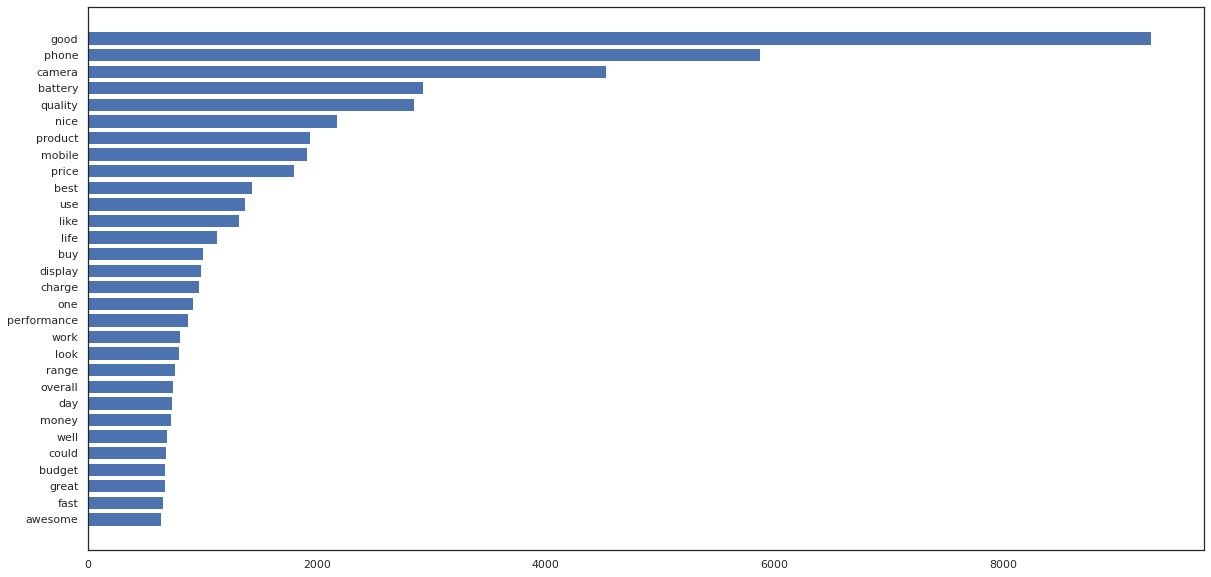

In [ ]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_tweets = prod1.loc[prod1['sentiment'] == 'Positive',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_tweets["Review-Body_processed"]])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,10))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

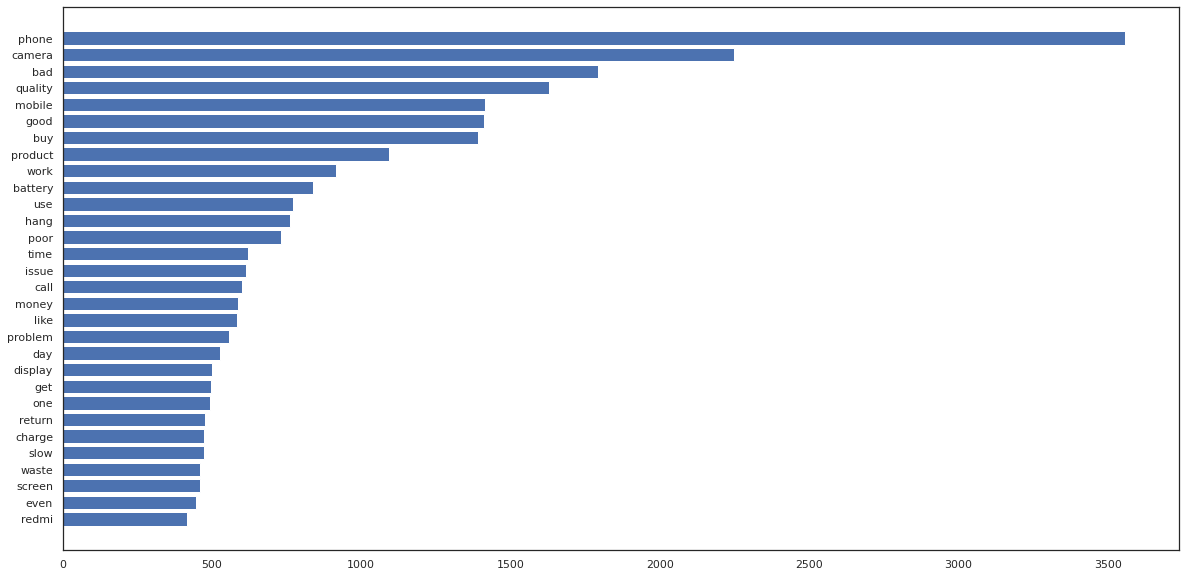

In [ ]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_tweets = prod1.loc[prod1['sentiment'] == 'Negative',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_tweets["Review-Body_processed"]])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,10))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

##WordCloud

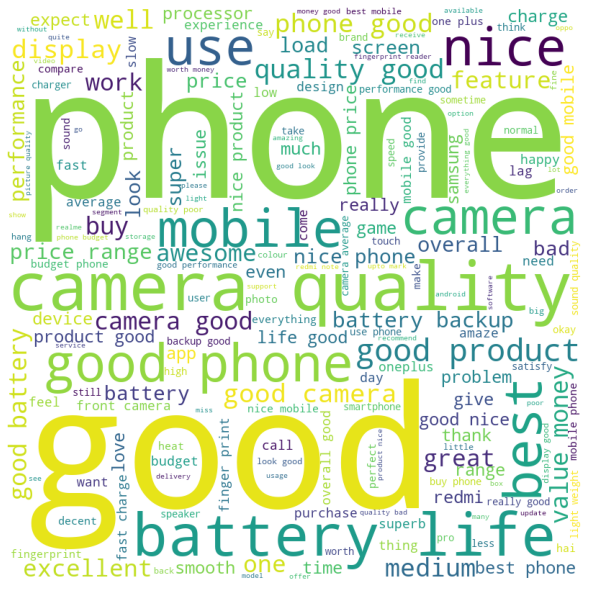

In [ ]:
##
## Building a Word Cloud
## 
from wordcloud import WordCloud
word_cloud_df = prod1.loc[prod1['sentiment'] == 'Positive',:]
all_words = ' '.join([text for text in word_cloud_df['Review-Body_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

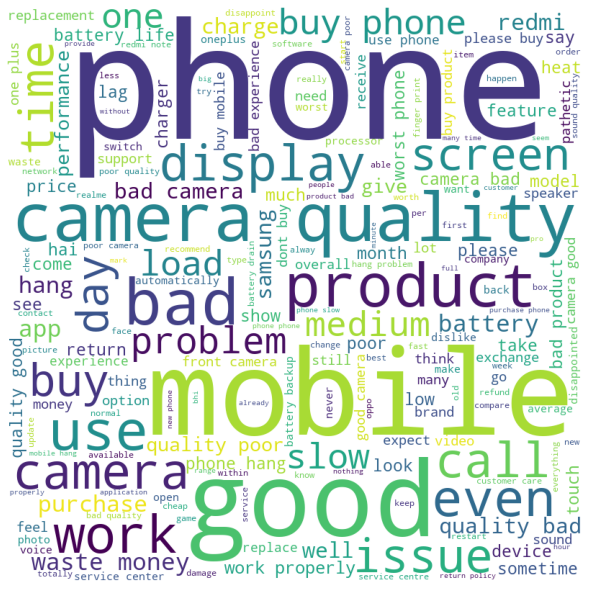

In [ ]:
word_cloud_df = prod1.loc[prod1['sentiment'] == 'Negative',:]
all_words = ' '.join([text for text in word_cloud_df['Review-Body_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

##Bag of Words model

In [ ]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing

# Creating sparse matrix of top 3000 tokens
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(prod1["Review-Body_processed"]).toarray()
le = preprocessing.LabelEncoder()
le.fit(prod1["sentiment"])
Y = le.transform(prod1["sentiment"])
featureNames = tfidf.get_feature_names()

#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)


In [ ]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.07495939, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
Y

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
X_train.shape, X_test.shape

((18527, 3000), (4632, 3000))

##Building the ML model

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty="l2", solver = "saga")

In [ ]:
lr.fit(X_train,Y_train)

LogisticRegression(solver='saga')

In [ ]:
lr.predict(X_test)

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, lr.predict(X_test), target_names=['Positive','Negative']))

              precision    recall  f1-score   support

    Positive       0.80      0.66      0.72      1348
    Negative       0.87      0.93      0.90      3284

    accuracy                           0.85      4632
   macro avg       0.83      0.80      0.81      4632
weighted avg       0.85      0.85      0.85      4632



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, lr.predict_proba(X_test)[:, 1])

0.9113477764685897

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

In [ ]:
print(classification_report(Y_test, classifier.predict(X_test), target_names=['Positive','Negative']))

              precision    recall  f1-score   support

    Positive       0.80      0.59      0.68      1348
    Negative       0.85      0.94      0.89      3284

    accuracy                           0.84      4632
   macro avg       0.83      0.77      0.79      4632
weighted avg       0.84      0.84      0.83      4632



In [ ]:
roc_auc_score(Y_test, classifier.predict_proba(X_test)[:, 1])

0.9072041812293759

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 200, criterion = "entropy")
RF.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [ ]:
RF.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(Y_test, RF.predict(X_test), target_names=['Positive','Negative']))

              precision    recall  f1-score   support

    Positive       0.78      0.66      0.71      1348
    Negative       0.87      0.92      0.89      3284

    accuracy                           0.85      4632
   macro avg       0.82      0.79      0.80      4632
weighted avg       0.84      0.85      0.84      4632



In [ ]:
roc_auc_score(Y_test, RF.predict_proba(X_test)[:, 1])

0.8952293649273341

##Calculating Percentage of Positive and Negative Reviews

In [ ]:
products["sentiment"] = prod1["sentiment"]
products

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name,Brands,sentiment
0,0,Worst phone ever,1,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus,Negative
1,1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus,Negative
2,2,Awesome look,5,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus,Positive
3,3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus,Positive
4,4,Read,1,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus,Negative
...,...,...,...,...,...,...,...
23772,23772,Batten in this rangee,4,Must he Bhai iss range me bas cemra thoda sa s...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",vivo,Positive
23773,23773,Good mobile,4,Good product,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",vivo,Positive
23774,23774,Good camera,5,Good,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",vivo,Positive
23775,23775,Warest mobile,1,Don't buy this mobile phone money weast screen...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",vivo,Negative


In [ ]:
reviews_count = products.groupby("Product Name")["sentiment"].value_counts().to_frame()

In [ ]:
reviews_count

sentiment
Product Name                                       sentiment           
OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)   Positive        3254
                                                   Negative        1019
OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128... Positive        2616
                                                   Negative         780
Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM      Positive        2311
                                                   Negative        1286
Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Stor... Positive        3126
                                                   Negative        1324
Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage) Positive        1795
                                                   Negative         847
Samsung Galaxy M32                                 Positive         847
                                                   Negative         489
realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB... Positive        1595
                                                   Negative         505
vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB... Positive         924
                                                   Negative         441

##Percentage of Positive and Negative Reviews for each Mobile phone

In [ ]:
review_percent = reviews_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
review_percent

sentiment
Product Name                                       sentiment           
OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)   Positive   76.152586
                                                   Negative   23.847414
OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128... Positive   77.031802
                                                   Negative   22.968198
Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM      Positive   64.247984
                                                   Negative   35.752016
Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Stor... Positive   70.247191
                                                   Negative   29.752809
Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage) Positive   67.940954
                                                   Negative   32.059046
Samsung Galaxy M32                                 Positive   63.398204
                                                   Negative   36.601796
realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB... Positive   75.952381
                                                   Negative   24.047619
vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB... Positive   67.692308
                                                   Negative   32.307692

##Avg Rating

In [ ]:
avg_rating = products.groupby("Product Name")["rating"].mean().to_frame()
avg_rating

,rating
Product Name,
"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)",3.723145
"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)",3.727621
Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM,3.251043
"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)",3.398876
"Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)",3.291446
Samsung Galaxy M32,3.180389
"realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)",3.655714
"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)",3.298901


##Ranking

In [ ]:
avg_rating.sort_values("rating",axis=0, ascending = False, inplace = True)
avg_rating

,rating
Product Name,
"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)",3.727621
"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)",3.723145
"realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)",3.655714
"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)",3.398876
"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)",3.298901
"Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)",3.291446
Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM,3.251043
Samsung Galaxy M32,3.180389
